In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas_gbq
#pip install pygraphviz
#import pygraphviz

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
Deals = 'VPN Supreme Via Metro Ethernet'

In [4]:
query = """
SELECT *
FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
WHERE DEAL_DESC = '{}'
ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
""".format(Deals)

In [5]:
query

"\nSELECT *\nFROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`\nWHERE DEAL_DESC = 'VPN Supreme Via Metro Ethernet'\nORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON\n"

In [6]:
orders_df = pd.read_gbq(query,
                project_id = 'bcx-insights',
                dialect = 'standard')

In [7]:
orders_df.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON
7670,Negotiation,2019-09-17 13:06:32+00:00,Negotiation,PR,Provide,2019-09-17 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,1950-01-01 00:00:00+00:00,O,F,8514869478081873188,791350067808366531,-4294911970669927908,-7570371634550205160
7671,Negotiation,2019-09-17 13:37:57+00:00,Negotiation,PR,Provide,2019-09-16 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,1950-01-01 00:00:00+00:00,O,F,-6394985945316873234,7372411383573846234,7838949866067390796,-7912435377258299037
7672,Negotiation,2019-09-17 13:44:07+00:00,Negotiation,PR,Provide,2019-09-16 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,1950-01-01 00:00:00+00:00,O,F,-6394985945316873234,7372411383573846234,-2131949195217428102,2434603730881556937


In [8]:
len(orders_df)

7673

In [9]:
orders_df = orders_df.drop_duplicates()

In [10]:
len(orders_df)

6494

In [11]:
orders_df['MSISDN_ANON'] = orders_df['MSISDN_ANON'].astype(str)

In [12]:
orders_df['ORDER_ID_ANON'] = orders_df['ORDER_ID_ANON'].astype(str)

In [13]:
unique_col = 'combo'

In [14]:
orders_df[unique_col] = orders_df['MSISDN_ANON']+'_'+orders_df['ORDER_ID_ANON']

In [15]:
orders_df['stage'] = orders_df.groupby(unique_col).cumcount()+1

In [16]:
final_stage = orders_df[[unique_col,'stage']].groupby(unique_col).max()

In [17]:
final_stage.rename(columns={'stage':'final_stage'}, inplace=True)

In [18]:
final_stage.head()

,final_stage
combo,
-1002630936265196775_6720229453350312433,1
-1004861776801299589_-3770146386127634145,1
-1006485497886894309_-1452672225476165256,1
-1009634493076411962_9046802873507809200,1
-1023364511737010692_5703003743036177533,1


In [19]:
orders_df = pd.merge(orders_df, final_stage, on=unique_col, how='outer')

In [20]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,combo,stage,final_stage
0,Done,2018-09-19 06:40:23+00:00,Done,PR,Provide,2018-09-17 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,2019-03-26 09:14:43+00:00,2019-05-17 07:06:20+00:00,C,F,-7382773693203000042,1987473634898016938,-2111471316335827717,-645583274016243248,-2111471316335827717_-7382773693203000042,1,1
1,Done,2018-09-19 06:45:16+00:00,Done,PR,Provide,2018-09-17 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,2019-05-16 15:47:57+00:00,2019-05-17 07:06:18+00:00,C,F,-7382773693203000042,1987473634898016938,3300419356566630655,2646874258865860398,3300419356566630655_-7382773693203000042,1,1
2,Done,2018-09-19 07:18:52+00:00,Done,PR,Provide,2018-09-11 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,2018-09-19 07:24:13+00:00,1950-01-01 00:00:00+00:00,C,F,124082684813619243,1746966847155632703,4658339983864229615,702190391188412804,4658339983864229615_124082684813619243,1,1
3,Done,2018-09-19 07:18:53+00:00,Done,PR,Provide,2018-09-11 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,2018-09-19 07:24:00+00:00,1950-01-01 00:00:00+00:00,C,F,124082684813619243,1746966847155632703,483225604046609602,-3159951794704107772,483225604046609602_124082684813619243,1,1
4,Done,2018-09-19 07:56:36+00:00,Done,CH,Change,2018-09-18 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,2018-09-27 09:46:23+00:00,2018-10-01 15:25:26+00:00,C,F,-36632720720381886,1746966847155632703,438359465696616299,-3847393485994424550,438359465696616299_-36632720720381886,1,1


In [21]:
orders_df['stage'] = orders_df['stage'].astype(str)

In [22]:
orders_df['ActionType_OrderStatus'] = orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [23]:
type_status = list(orders_df['ActionType_OrderStatus'].unique())

In [24]:
orders_df['stage_ActionType_OrderStatus'] = orders_df['stage'] +') * '+ orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [25]:
orders_df.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,combo,stage,final_stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
6491,Negotiation,2019-09-17 13:06:32+00:00,Negotiation,PR,Provide,2019-09-17 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,8514869478081873188,791350067808366531,-4294911970669927908,-7570371634550205160,-4294911970669927908_8514869478081873188,1,1,Provide * Negotiation,1) * Provide * Negotiation
6492,Negotiation,2019-09-17 13:37:57+00:00,Negotiation,PR,Provide,2019-09-16 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,-6394985945316873234,7372411383573846234,7838949866067390796,-7912435377258299037,7838949866067390796_-6394985945316873234,1,1,Provide * Negotiation,1) * Provide * Negotiation
6493,Negotiation,2019-09-17 13:44:07+00:00,Negotiation,PR,Provide,2019-09-16 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,-6394985945316873234,7372411383573846234,-2131949195217428102,2434603730881556937,-2131949195217428102_-6394985945316873234,1,1,Provide * Negotiation,1) * Provide * Negotiation


In [26]:
#orders_df.groupby(unique_col)

In [27]:
customers = list(orders_df[unique_col].unique())

In [28]:
sorted_df = orders_df.sort_values('stage', ascending=False)
sorted_df.head(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,combo,stage,final_stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
3769,Cancelled,2019-04-16 15:49:24+00:00,Cancelled,PR,Provide,1950-01-01 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,-3847351979405266734,-975655849652574677,5100925659296341771,5841180286147341086,5100925659296341771_-3847351979405266734,7,7,Provide * Cancelled,7) * Provide * Cancelled
3768,Cancelled,2019-04-16 15:49:24+00:00,Cancelled,PR,Provide,1950-01-01 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,-3847351979405266734,-975655849652574677,5100925659296341771,-3190571156986560252,5100925659296341771_-3847351979405266734,6,7,Provide * Cancelled,6) * Provide * Cancelled
3767,Cancelled,2019-04-16 15:46:28+00:00,Cancelled,PR,Provide,2019-04-16 00:00:00+00:00,Call Center,Call Center,VPN Supreme Via Metro Ethernet,1950-01-01 00:00:00+00:00,...,F,-3847351979405266734,-975655849652574677,5100925659296341771,-3907467736038545539,5100925659296341771_-3847351979405266734,5,7,Provide * Cancelled,5) * Provide * Cancelled


In [29]:
len(orders_df[orders_df['stage']=='2'])

679

In [30]:
len(customers)

5800

In [31]:
# Create a networkx graph object
J = nx.Graph()

In [32]:
J.clear()

In [33]:
max_stage=max(orders_df['stage'].astype(int))
max_stage

7

In [34]:
actions = list(orders_df['stage_ActionType_OrderStatus'].unique())

In [35]:
J.add_node(Deals[:3],posi=(0.8,10), color = 'purple')

In [36]:
for i in range(1,max_stage+1):
  
  stage_actions = list(orders_df[orders_df['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    J.add_node(stage_actions[k],posi=(i*1.25,height))
    #print(stage_actions[k])
    #print((i,k+1))

In [37]:
J.nodes(data = True)

NodeDataView({'1) * Automatic Update Billing * Cancelled': {'posi': (1.25, 27)}, '1) * Cease * Amended': {'posi': (1.25, 41)}, '2) * Change * Cancelled': {'posi': (2.5, 10)}, '2) * Suspend * Done': {'posi': (2.5, 22)}, '1) * Change * Done': {'posi': (1.25, 2)}, '1) * Indoor transfer * To Be Cancelled': {'posi': (1.25, 29)}, '2) * Provide * Negotiation': {'posi': (2.5, 6)}, '1) * Outdoor Transfer * Negotiation': {'posi': (1.25, 37)}, '3) * Change * Done': {'posi': (3.75, 2)}, '1) * Re-establish * Done': {'posi': (1.25, 28)}, '3) * Provide * Done': {'posi': (3.75, 1)}, '1) * Change BAN To BAN * Done': {'posi': (1.25, 16)}, '1) * Resume * Done': {'posi': (1.25, 25)}, '7) * Provide * Cancelled': {'posi': (8.75, 3)}, '1) * Provide * Negotiation': {'posi': (1.25, 6)}, '1) * Provide * To Be Cancelled': {'posi': (1.25, 31)}, '6) * Provide * Cancelled': {'posi': (7.5, 3)}, '1) * Outdoor Transfer * Done': {'posi': (1.25, 14)}, '1) * Provide * Cancelled': {'posi': (1.25, 3)}, '2) * Cease * Done':

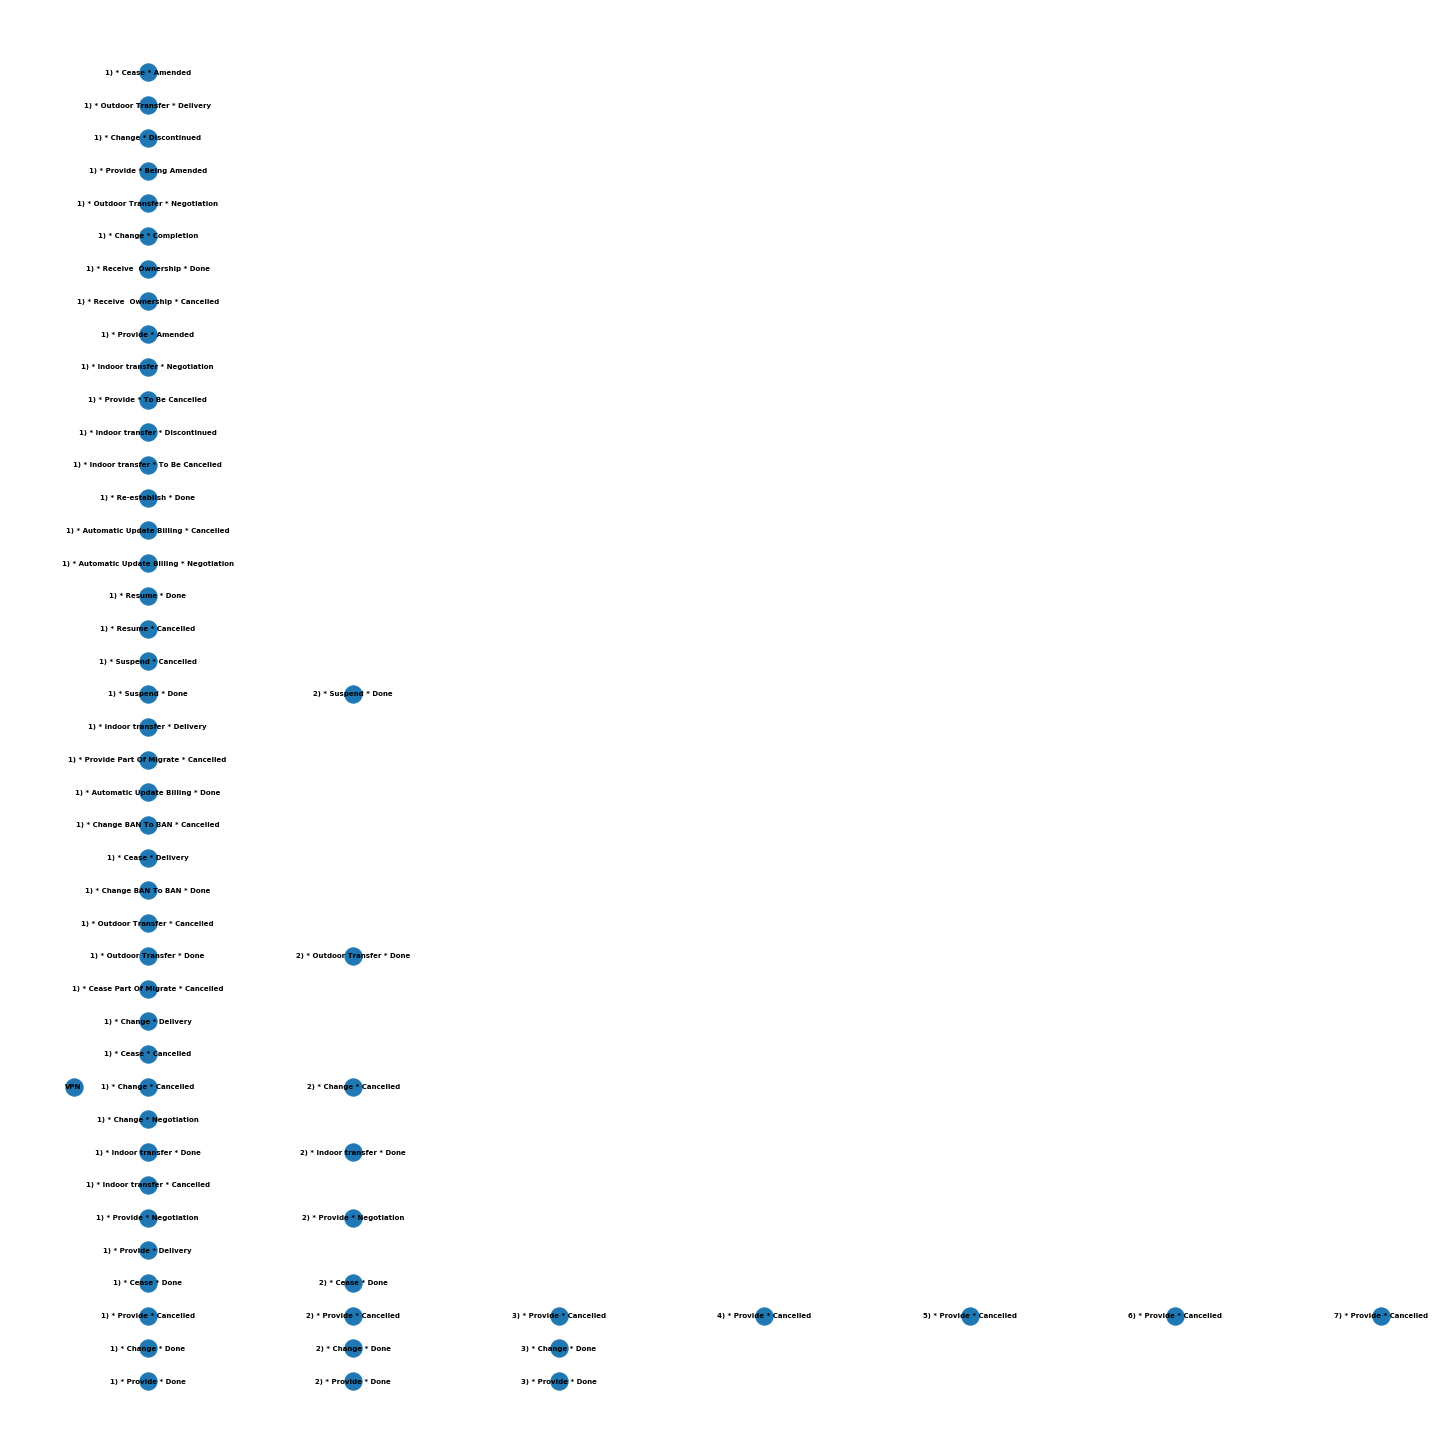

In [38]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [39]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [40]:
#create edges with data (count, days, ave_days)

date_col = orders_df.columns.get_loc('ORDER_CREATION_DATE')
kpi = 5

for c in customers:

    temp_df = orders_df[orders_df[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
            #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
            J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(difference.total_seconds()/(60*60*24),1)
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'

        else:
            current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

            current_days =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(current_days + difference.total_seconds()/(60*60*24),1)

            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'


In [41]:
# add edge weight attribute

all_counts = []

#Iterate through the graph edges to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) 

    
total_count = sum(all_counts)
max_count = max(all_counts)
min_count = min(all_counts)
ave_count = total_count/len(all_counts)
scale = 14

print(total_count)
print(max_count)
print(min_count)
print(ave_count)


if (max_count-min_count) == 0:
    for (node1,node2,data) in J.edges(data=True):
        J.edges[node1,node2]['weight'] = round(J.edges[node1,node2]['count'],1)

else:                                                
    for (node1,node2,data) in J.edges(data=True):
        J.edges[node1,node2]['weight'] = round(((J.edges[node1,node2]['count']-min_count)/(max_count-min_count))*scale+1,1)
    

694
334
1
34.7


In [42]:
J.edges(data=True)

EdgeDataView([('2) * Change * Cancelled', '1) * Change * Cancelled', {'color': 'red', 'ave_days': 16.9, 'weight': 1.0, 'count': 1, 'days': 16.9}), ('2) * Change * Cancelled', '3) * Change * Done', {'color': 'green', 'ave_days': 3.0, 'weight': 1.0, 'count': 1, 'days': 3.0}), ('2) * Suspend * Done', '1) * Suspend * Cancelled', {'color': 'red', 'ave_days': 7.8, 'weight': 1.0, 'count': 2, 'days': 15.6}), ('2) * Provide * Negotiation', '1) * Provide * To Be Cancelled', {'color': 'red', 'ave_days': 67.5, 'weight': 1.3, 'count': 7, 'days': 472.3}), ('2) * Provide * Negotiation', '1) * Provide * Negotiation', {'color': 'green', 'ave_days': 0.0, 'weight': 1.0, 'count': 1, 'days': 0.0}), ('3) * Provide * Done', '2) * Provide * Cancelled', {'color': 'red', 'ave_days': 18.2, 'weight': 1.0, 'count': 2, 'days': 36.4}), ('7) * Provide * Cancelled', '6) * Provide * Cancelled', {'color': 'green', 'ave_days': 0.0, 'weight': 1.0, 'count': 1, 'days': 0.0}), ('6) * Provide * Cancelled', '5) * Provide * Can

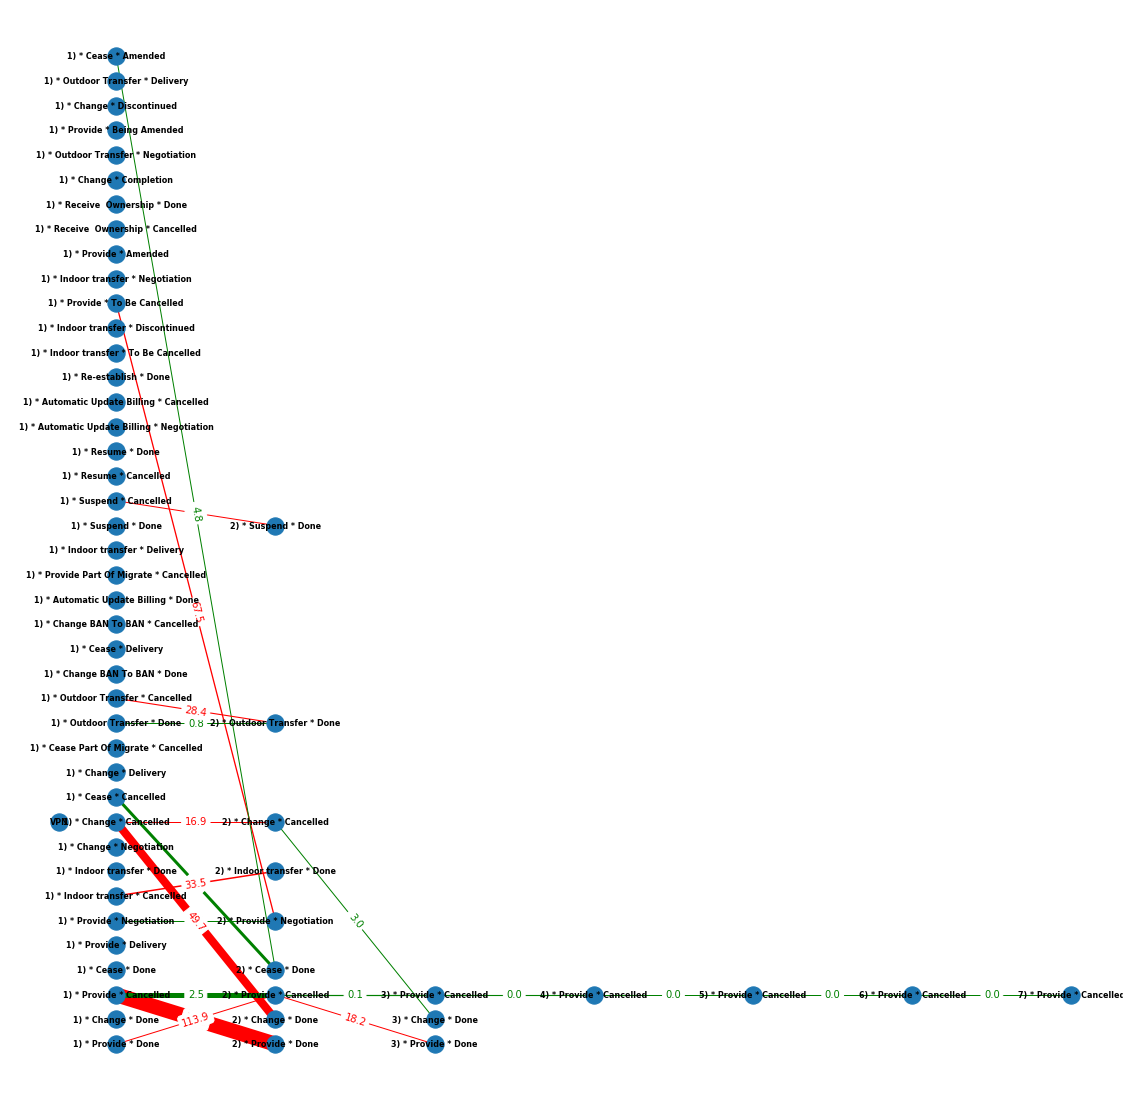

In [43]:
# Draw the resulting graph

#mpl_fig = plt.figure()
mpl_fig, ax = plt.subplots(1,1)

#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
edges,colors = zip(*nx.get_edge_attributes(J,'color').items())
edges,width = zip(*nx.get_edge_attributes(J,'weight').items())


nx.draw(J,pos, ax=ax, with_labels=True, font_weight='bold', font_size = 8, edgelist=edges, edge_color=colors, width = width
       )

edge_labels  = nx.get_edge_attributes(J,'ave_days')
#label_color  = nx.get_edge_attributes(J,'color').values()

#print(pos)

for e in J.edges(data=True):
    #print(e)
    #print(e[0])
    #print(e[1])
    #print(e[2])
    #print(e[2]['color'])
    nx.draw_networkx_edge_labels(J,ax=ax, pos=pos,edge_labels={(e[0],e[1]):e[2]['ave_days']}, font_color = e[2]['color'])

plt.savefig('stage_transition_edge_colour')
plt.show()

In [44]:
type(mpl_fig)

matplotlib.figure.Figure

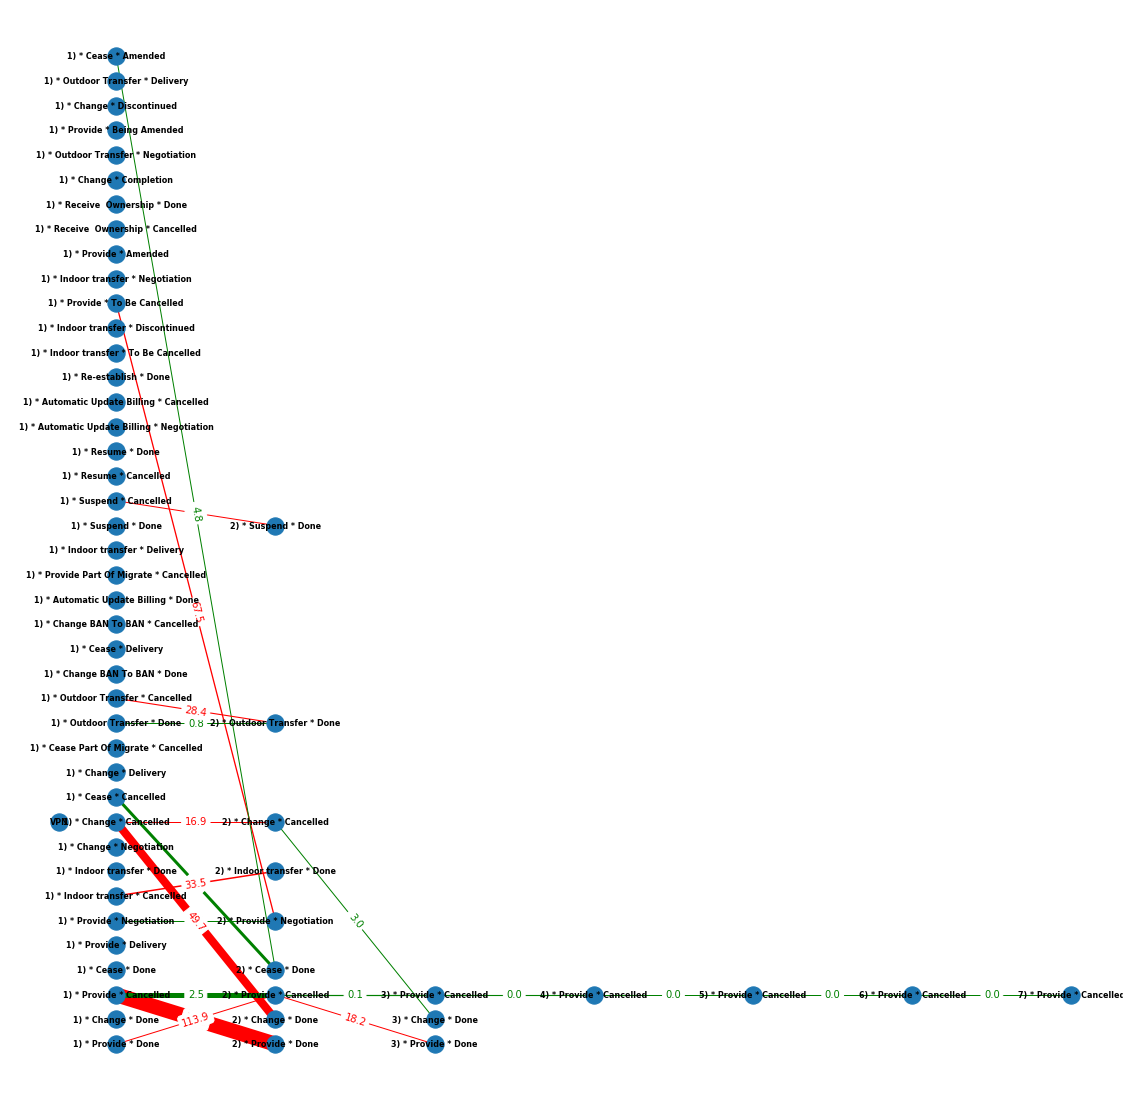

In [45]:
mpl_fig

In [46]:
#pip install dash==1.4.1

In [47]:
#pip install chart_studio

In [48]:
import chart_studio.plotly as py
from plotly.tools import mpl_to_plotly
import dash_core_components as dcc


In [61]:
elarge = [(u, v) for (u, v, d) in J.edges(data=True)]

In [63]:
Xn=[pos[k][0] for k in pos]
Yn=[pos[k][1] for k in pos]
labels = [k for k in pos]

In [64]:
nodes=dict(type='scatter',
           x=Xn, 
           y=Yn,
           mode='markers+text',
           marker=dict(size=28, color='rgb(31,120,180)'),
           textfont=dict(size=22, color='#DBD700'),
           text=labels,
           hoverinfo='text')

In [65]:
Xaxis=dict(showline=False, zeroline=False, showgrid=False, showticklabels=True,
          mirror='allticks', ticks='inside', ticklen=5, tickfont = dict(size=14),
          title='')

Yaxis=dict(showline=False, zeroline=False, showgrid=False, showticklabels=True,
          mirror='allticks', ticks='inside', ticklen=5, tickfont = dict(size=14), 
          title='')

In [66]:
annotateELarge = [ dict(showarrow=True, arrowsize=0.9, arrowwidth=6, arrowhead=5, standoff=14, startstandoff=4,
                         ax=pos[arrow[0]][0], ay=pos[arrow[0]][1], axref='x', ayref='y',
                         x=pos[arrow[1]][0], y=pos[arrow[1]][1], xref='x', yref='y'
                        ) for arrow in elarge]

In [67]:
layout=dict(width=800, height=600,
            showlegend=False,
            xaxis=Xaxis,
            yaxis=Yaxis,
            hovermode='closest',
            plot_bgcolor='#E5ECF6',
            annotations= annotateELarge #arrows
            )

In [68]:
plotly_fig = dict(data=[nodes], layout=layout)

In [70]:
'''
#Dash page stub
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(children=[
    dcc.Graph(id='network-graph', figure=plotly_fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)

'''

"\n#Dash page stub\nexternal_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']\napp = dash.Dash(__name__, external_stylesheets=external_stylesheets)\napp.layout = html.Div(children=[\n    dcc.Graph(id='network-graph', figure=plotly_fig)\n])\n\nif __name__ == '__main__':\n    app.run_server(debug=True)\n\n"

In [71]:
graph = dcc.Graph(id='myGraph', figure=plotly_fig)

In [72]:
graph

Graph(id='myGraph', figure={'data': [{'mode': 'markers+text', 'hoverinfo': 'text', 'x': [1.25, 1.25, 2.5, 2.5, 1.25, 1.25, 2.5, 1.25, 3.75, 1.25, 3.75, 1.25, 1.25, 8.75, 1.25, 1.25, 7.5, 1.25, 1.25, 2.5, 1.25, 1.25, 5.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 2.5, 1.25, 1.25, 1.25, 1.25, 2.5, 1.25, 1.25, 1.25, 1.25, 0.8, 1.25, 1.25, 1.25, 1.25, 2.5, 1.25, 6.25, 1.25, 1.25, 1.25, 1.25, 3.75, 1.25, 2.5, 1.25, 2.5, 1.25, 1.25], 'textfont': {'color': '#DBD700', 'size': 22}, 'text': ['1) * Automatic Update Billing * Cancelled', '1) * Cease * Amended', '2) * Change * Cancelled', '2) * Suspend * Done', '1) * Change * Done', '1) * Indoor transfer * To Be Cancelled', '2) * Provide * Negotiation', '1) * Outdoor Transfer * Negotiation', '3) * Change * Done', '1) * Re-establish * Done', '3) * Provide * Done', '1) * Change BAN To BAN * Done', '1) * Resume * Done', '7) * Provide * Cancelled', '1) * Provide * Negotiation', '1) * Provide * To Be Cancelled', '6) * Provide * Cancelled', '1) * Outdoor Trans